In [3]:
import pandas as pd
# Load dataset
uber_data=pd.read_csv("Uber_Drives_2016.csv")
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [10]:
# Display shape 
print(uber_data.shape)

(1156, 7)


In [9]:
# unique values in the CATEGORY column
print(uber_data['CATEGORY*'].unique())

['Business' 'Personal' nan]


In [5]:
#find how many null values are there in PURPOSE
print(uber_data['PURPOSE*'].isnull().sum())

503


In [20]:
# Rename
print(list(uber_data.columns))
uber_data.columns=uber_data.columns.str.upper()
print(list(uber_data.columns))

['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*', 'PURPOSE*']
['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*', 'PURPOSE*']


In [21]:
#Display Rides Where CATEGORY == 'Business'
business_rides = uber_data[uber_data['CATEGORY*'] == 'Business']
business_rides.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
#Show top 5 rides with the longest distance (MILES).
print(uber_data.sort_values(by='MILES*', ascending=False).head(5))

           START_DATE*         END_DATE* CATEGORY*            START*  \
1155            Totals               NaN       NaN               NaN   
269    3/25/2016 16:52   3/25/2016 22:22  Business             Latta   
270    3/25/2016 22:54    3/26/2016 1:39  Business      Jacksonville   
881   10/30/2016 15:22  10/30/2016 18:23  Business         Asheville   
776    9/27/2016 21:01    9/28/2016 2:37  Business  Unknown Location   

                 STOP*   MILES*        PURPOSE*  
1155               NaN  12204.7             NaN  
269       Jacksonville    310.3  Customer Visit  
270          Kissimmee    201.0         Meeting  
881             Mebane    195.9             NaN  
776   Unknown Location    195.6             NaN  


In [ ]:
uber_data['PURPOSE*'] = uber_data['PURPOSE*'].fillna('Not Specified')

In [ ]:
print(uber_data.columns)

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')


In [17]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'])# Convert START_DATE and END_DATE to datetime format

uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'])

In [18]:
uber_data['TRIP_DURATION'] = uber_data['END_DATE*'] - uber_data['START_DATE*'] # Create TRIP_DURATION column

In [19]:
print(uber_data[['START_DATE*', 'END_DATE*']].isnull().sum()) # Display the updated DataFrame


START_DATE*    1
END_DATE*      1
dtype: int64


In [ ]:
sorted_trips = uber_data.sort_values(by='MILES*', ascending=False)
print(sorted_trips)

             START_DATE*           END_DATE* CATEGORY*            START*  \
1155                 NaT                 NaT       NaN               NaN   
269  2016-03-25 16:52:00 2016-03-25 22:22:00  Business             Latta   
270  2016-03-25 22:54:00 2016-03-26 01:39:00  Business      Jacksonville   
881  2016-10-30 15:22:00 2016-10-30 18:23:00  Business         Asheville   
776  2016-09-27 21:01:00 2016-09-28 02:37:00  Business  Unknown Location   
...                  ...                 ...       ...               ...   
1111 2016-12-25 00:10:00 2016-12-25 00:14:00  Business            Lahore   
516  2016-07-05 16:48:00 2016-07-05 16:52:00  Business       Whitebridge   
420  2016-06-08 17:16:00 2016-06-08 17:18:00  Business              Soho   
120  2016-02-17 16:38:00 2016-02-17 16:43:00  Business        Katunayaka   
44   2016-01-26 17:27:00 2016-01-26 17:29:00  Business              Cary   

                 STOP*   MILES*         PURPOSE*   TRIP_DURATION  
1155               N

In [ ]:
average_miles = uber_data.groupby('CATEGORY*')['MILES*'].mean()
print(average_miles)

CATEGORY*
Business    10.655844
Personal     9.320779
Name: MILES*, dtype: float64


In [ ]:
trip_counts = uber_data['PURPOSE*'].value_counts()
print(trip_counts)

PURPOSE*
Not Specified      503
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64


In [ ]:
top_locations = uber_data['START*'].value_counts().head(3)
print(top_locations)

START*
Cary                201
Unknown Location    148
Morrisville          85
Name: count, dtype: int64


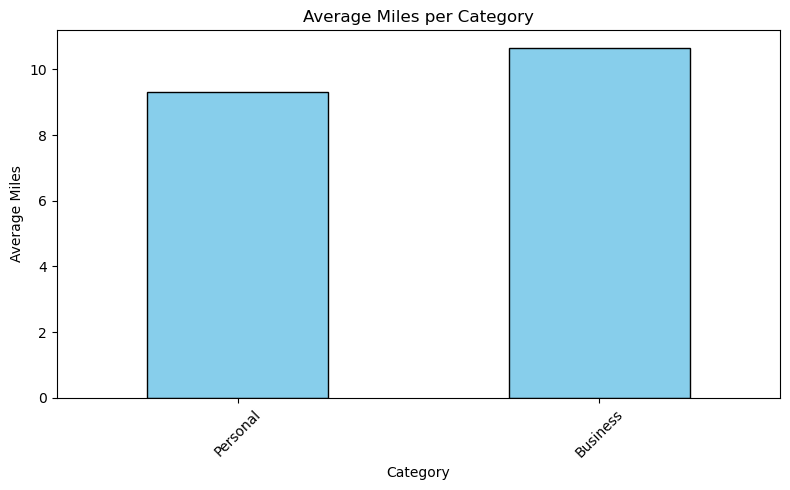

In [ ]:
import matplotlib.pyplot as plt )

average_miles = uber_data.groupby('CATEGORY*')['MILES*'].mean().sort_values()
# bar chart 
plt.figure(figsize=(8, 5))
average_miles.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Miles per Category')
plt.xlabel('Category')
plt.ylabel('Average Miles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

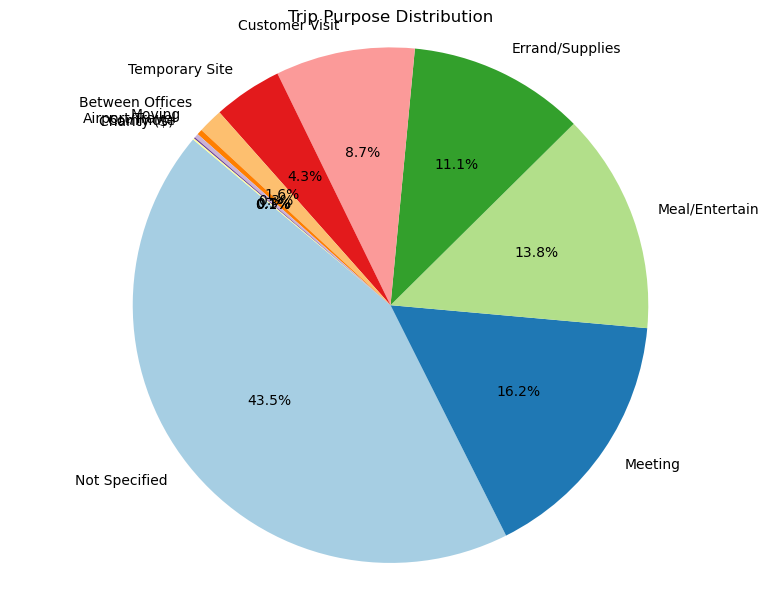

In [ ]:
# Counting the trips by purpose
purpose_counts = uber_data['PURPOSE*'].value_counts()
# Plotting for pie chart 
plt.figure(figsize=(8, 6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Trip Purpose Distribution')
plt.axis('equal') 
plt.tight_layout()
plt.show()
